In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary_methods import *
from zbias_data_generation import MonteCarloSimulation


    Data generation - Monte Carlo simulation Simulations
        - Additive model
        - Multiplicative model


    Assumed Causal diagram:
        U       -       An unmeasured confounder
        Z       -       Instrumental variable
        (X,Y)   -       The exposure-outcome pair

    Graph structure:
        U -> X (alpha1)
        U -> Y (beta1)
        X -> Y (beta2)
        Z -> U (gamma1)
        Z -> X (alpha2)

    The true "exposure effect" and target of estimation is beta2.

    For simplicity and to reflect a common study framework, all variables are binary.

    The measured covariate Z may act as a confounder or as an instrumental variable for the exposure-outcome pair (X, Y).
    Note that Z is not a perfect instrument because it is associated with the unmeasured confounder U through gamma1
    However, by varying the value of gamma1, we can explore the impacts of conditioning on Z when it is a perfect instrument and when it is a near-instrument or confounder.
    

In [2]:
max_k = 30

In [3]:
M = MonteCarloSimulation(n_simulations=1, dataset_size=10000, random_seed=1976)

Start Monte Carlo Simulation .. 2019-03-13 21:00:46.211814
Start Additive Simulation .. 2019-03-13 21:00:46.213534
Finish Additive Simulation .. 2019-03-13 21:00:46.218516
Start Multiplicative Simulation .. 2019-03-13 21:00:46.219022
Finish Multiplicative Simulation .. 2019-03-13 21:00:46.227056
Finish Monte Carlo Simulation .. 2019-03-13 21:00:46.227200


In [4]:
M.multi_data.shape

(10000, 3)

In [5]:
df = M.multi_data
df.head()

,Z,T,Y
0,1,0,0
1,0,0,0
2,1,1,0
3,1,1,0
4,0,1,0


# Baseline evaluations

In [6]:
IPW = calc_inv_propensity_score_weighting(df)
IPW

-0.1467831119444345

In [7]:
baseline_euclidean = calc_matching(df, dist_func='euclidean', k=range(1, max_k+1))
baseline_euclidean[0]

0.0411240575736806

In [8]:
baseline_mahalanobis = calc_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
baseline_mahalanobis[0]

0.0411240575736806

# Evaluations from treatment predictions

In [9]:
model_t_euclidean = calc_model_t_shap_matching(df, dist_func='euclidean', k=range(1,max_k+1))
model_t_euclidean[0]

0.0411240575736806

In [10]:
model_t_mahalanobis = calc_model_t_shap_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
model_t_mahalanobis[0]

0.0411240575736806

# Evaluation from outcome predictions

In [11]:
model_y_euclidean = calc_model_y_shap_matching(df, dist_func='euclidean', k=range(1,max_k+1))
model_y_euclidean[0]

0.0411240575736806

In [12]:
model_y_mahalanobis = calc_model_y_shap_matching(df, dist_func='mahalanobis', k=range(1,max_k+1))
model_y_mahalanobis[0]

0.0411240575736806

# Evaluation from outcome and treatment predictions

In [13]:
model_y_model_t_euclidean = calc_model_y_and_model_t_shap_matching(
    df, combining_method='ratio', dist_func='euclidean', k=range(1,max_k+1))
model_y_model_t_euclidean[0]

0.0411240575736806

In [14]:
model_y_model_t_mahalanobis = calc_model_y_and_model_t_shap_matching(
    df, combining_method='ratio', dist_func='mahalanobis', k=range(1,max_k+1))
model_y_model_t_mahalanobis[0]

0.0411240575736806

# Save all joint values

In [15]:
joint_values = pd.DataFrame({'k':range(1, max_k+1), 
                            'baseline_euclidean':baseline_euclidean, 
                            'baseline_mahalanobis':baseline_mahalanobis, 
                            'model_t_euclidean':model_t_euclidean, 
                            'model_t_mahalanobis':model_t_mahalanobis, 
                            'model_y_euclidean':model_y_euclidean, 
                            'model_y_mahalanobis':model_y_mahalanobis, 
                            'model_y_model_t_euclidean':model_y_model_t_euclidean, 
                            'model_y_model_t_mahalanobis':model_y_model_t_mahalanobis
                           })
joint_values.head(30)

,k,baseline_euclidean,baseline_mahalanobis,model_t_euclidean,model_t_mahalanobis,model_y_euclidean,model_y_mahalanobis,model_y_model_t_euclidean,model_y_model_t_mahalanobis
0,1,0.041124,0.041124,0.041124,0.041124,0.041124,0.041124,0.041124,0.041124
1,2,-0.054489,-0.054489,-0.054489,-0.054489,-0.054489,-0.054489,-0.458876,-0.458876
2,3,-0.022618,-0.022618,-0.022618,-0.022618,-0.022618,-0.022618,-0.292209,-0.292209
3,4,-0.006683,-0.006683,-0.006683,-0.006683,-0.006683,-0.006683,-0.208876,-0.208876
4,5,0.002879,0.002879,0.002879,0.002879,0.002879,0.002879,-0.158876,-0.158876
5,6,0.009253,0.009253,0.009253,0.009253,0.009253,0.009253,-0.125543,-0.125543
6,7,0.013806,0.013806,0.013806,0.013806,0.013806,0.013806,-0.101733,-0.101733
7,8,0.017221,0.017221,0.017221,0.017221,0.017221,0.017221,-0.083876,-0.083876
8,9,-0.069987,-0.069987,-0.069987,-0.069987,-0.069987,-0.069987,-0.069987,-0.069987
9,10,-0.077999,-0.077999,-0.077999,-0.077999,-0.077999,-0.077999,-0.158876,-0.158876


In [16]:
joint_values.to_csv('../Data/z_bias_multiplicative_outputs.csv')

In [17]:
joint_values = pd.read_csv('../Data/z_bias_multiplicative_outputs.csv', index_col=0)

# Plot the joint values

In [18]:
joint_values.columns[1:]

Index(['baseline_euclidean', 'baseline_mahalanobis', 'model_t_euclidean',
       'model_t_mahalanobis', 'model_y_euclidean', 'model_y_mahalanobis',
       'model_y_model_t_euclidean', 'model_y_model_t_mahalanobis'],
      dtype='object')

In [19]:
long_values = pd.DataFrame(columns=['num_neighbors', 'model_type', 'distance', 'ATT value'])
for model_type in ['baseline', 'model_t', 'model_y', 'model_y_model_t']:
    for distance in ['euclidean', 'mahalanobis']:
        long_values = pd.concat([long_values, 
                                 pd.DataFrame({'num_neighbors':joint_values.k, 
                                               'model_type':model_type, 
                                               'distance':distance, 
                                               'ATT value':joint_values['_'.join([model_type, distance])]})])
long_values.shape

(240, 4)

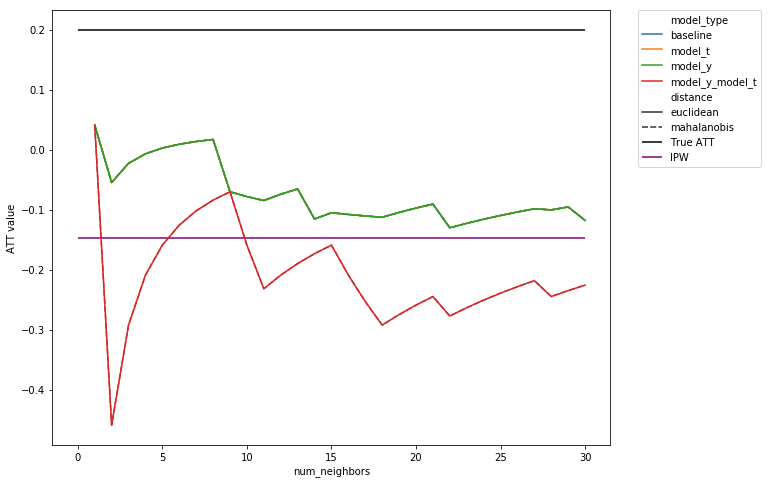

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=long_values, x='num_neighbors', y='ATT value', hue='model_type', style='distance')
plt.hlines(0.2, 0, joint_values.k.max(), label="True ATT")
plt.hlines(IPW, 0, joint_values.k.max(), colors=['purple'], label="IPW")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('../Paper/images/z_bias_multiplicative_ATT_estimations_by_k_neighbors.jpg')
plt.show()